In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
# Normalize pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# Flatten images to 1D array
x_train_flat = x_train.reshape((-1, 28*28))
x_test_flat = x_test.reshape((-1, 28*28))

In [5]:
from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=None)
y_test_onehot = to_categorical(y_test, num_classes=None)

In [10]:
def build_mlp(num_layers, num_neurons, activation, learning_rate, optimizer, batch_norm, regularization):
    model = models.Sequential()
    
    # Add input layer
    model.add(layers.Input(shape=(28*28,)))
    
    # Add hidden layers
    for _ in range(num_layers):
        model.add(layers.Dense(num_neurons, activation=activation))
        if batch_norm:
            model.add(layers.BatchNormalization())
        if regularization:
            model.add(layers.Dropout(0.5))
    
    # Add output layer
    model.add(layers.Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=optimizer(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [ ]:
# Define parameter combinations to try
num_layers_list = [2, 3]  # Number of hidden layers
num_neurons_list = [64, 128]  # Number of neurons per layer
activation_list = ['relu', 'sigmoid']  # Activation functions
learning_rate_list = [0.001, 0.01]  # Learning rates
optimizer_list = [keras.optimizers.Adam, keras.optimizers.SGD]  # Optimizers
batch_norm_list = [True, False]  # Batch normalization
regularization_list = [True, False]  # Regularization

In [12]:
import itertools

# Define parameter combinations to try
param_combinations = itertools.product(num_layers_list, num_neurons_list, activation_list, learning_rate_list, optimizer_list, batch_norm_list, regularization_list)

# Initialize list to store results
results = []

# Loop through parameter combinations
for combination in param_combinations:
    num_layers, num_neurons, activation, learning_rate, optimizer, batch_norm, regularization = combination
    print(f"Training model with {num_layers} layers, {num_neurons} neurons per layer, and activation function {activation}...")
    
    # Build and compile the model
    model = build_mlp(num_layers, num_neurons, activation, learning_rate, optimizer, batch_norm, regularization)
    
    # Train the model
    history = model.fit(x_train_flat, y_train_onehot, epochs=10, batch_size=128, validation_data=(x_test_flat, y_test_onehot), verbose=0)
    
    # Evaluate the model
    _, test_accuracy = model.evaluate(x_test_flat, y_test_onehot, verbose=0)
    results.append((num_layers, num_neurons, activation, learning_rate, optimizer.__name__, batch_norm, regularization, test_accuracy))

# Print results
print("\nResults:")
for result in results:
    print(f"Number of layers: {result[0]}, Number of neurons per layer: {result[1]}, Activation function: {result[2]}, Learning rate: {result[3]}, Optimizer: {result[4]}, Batch normalization: {result[5]}, Regularization: {result[6]}, Test Accuracy: {result[7]}")

Training model with 2 layers, 64 neurons per layer, and activation function relu...
Training model with 2 layers, 64 neurons per layer, and activation function relu...
Training model with 2 layers, 64 neurons per layer, and activation function relu...
Training model with 2 layers, 64 neurons per layer, and activation function relu...
Training model with 2 layers, 64 neurons per layer, and activation function relu...
Training model with 2 layers, 64 neurons per layer, and activation function relu...
Training model with 2 layers, 64 neurons per layer, and activation function relu...
Training model with 2 layers, 64 neurons per layer, and activation function relu...
Training model with 2 layers, 64 neurons per layer, and activation function relu...
Training model with 2 layers, 64 neurons per layer, and activation function relu...
Training model with 2 layers, 64 neurons per layer, and activation function relu...
Training model with 2 layers, 64 neurons per layer, and activation function 

In [15]:
# Column index to check
col_index = 7 

# Initialize max_value with the minimum possible value
max_value = float('-inf')
max_array = None

# Iterate through the rows of the array
for result in results:
    # Get the element at the specified column index
    val = result[col_index]
    # Update max_value if the current element is greater
    if val > max_value:
        max_value = val
        max_array = result

print("Maximum value in the specified column:", max_value)
print("Maximum array in the specified column:", max_array)

Maximum value in the specified column: 0.8838000297546387
Maximum array in the specified column: (3, 128, 'relu', 0.001, 'Adam', False, False, 0.8838000297546387)


In [19]:
model = build_mlp(3, 128, 'relu', 0.001, keras.optimizers.Adam, False, False)
# Train the model
history = model.fit(x_train_flat, y_train_onehot, epochs=10, batch_size=128, validation_data=(x_test_flat, y_test_onehot), verbose=0)    # Evaluate the model

Training Loss: 0.23062103986740112
Training Accuracy: 0.9122999906539917
Validation Loss: 0.33373525738716125
Validation Accuracy: 0.880299985408783


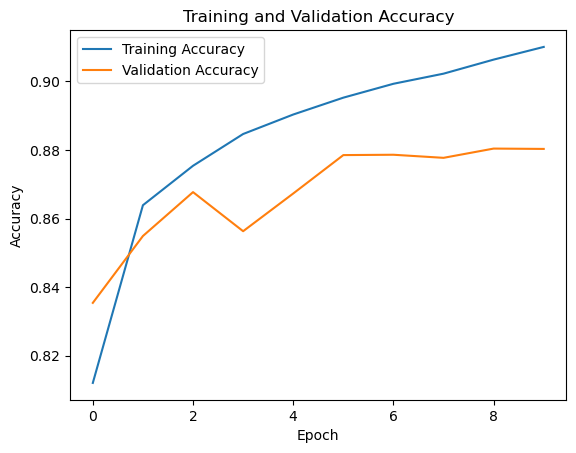

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
Confusion Matrix:
[[892  16   6  25   4   2  49   0   6   0]
 [  0 986   0   9   2   0   2   0   1   0]
 [ 24   8 761  16 118   0  68   0   5   0]
 [ 26  53   5 869  21   0  22   0   4   0]
 [  1   5  72  41 830   0  48   0   3   0]
 [  0   0   0   1   0 967   0  20   0  12]
 [201   5  76  30  78   1 602   0   7   0]
 [  0   0   0   0   0  15   0 969   0  16]
 [  6   1   1   5   1   2   1   3 980   0]
 [  0   0   0   0   0   5   1  47   0 947]]


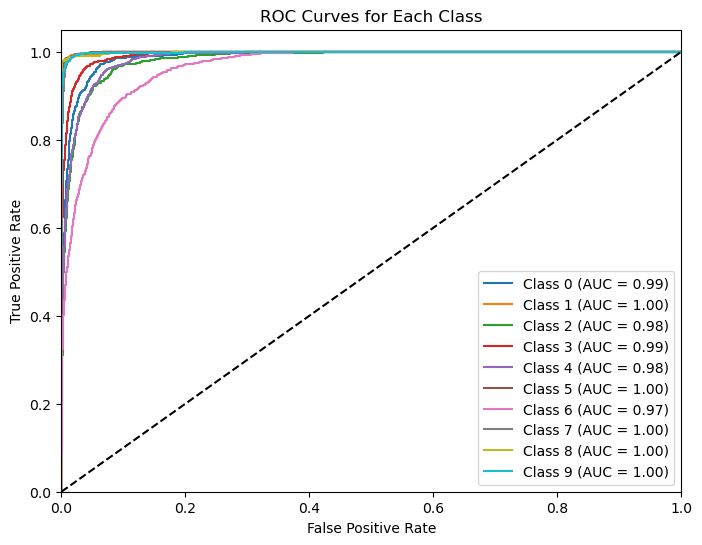

In [22]:
# a. Training loss and accuracy
train_loss, train_accuracy = model.evaluate(x_train_flat, y_train_onehot, verbose=0)
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

# b. Validation (test) loss and accuracy
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_onehot, verbose=0)
print("Validation Loss:", test_loss)
print("Validation Accuracy:", test_accuracy)

# c. Plotting the graph of training accuracy and validation accuracy per epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# d. Confusion Matrix
# Get predicted probabilities for each class
y_prob = model.predict(x_test_flat)
# Get the index of the class with the highest probability for each sample
y_pred = np.argmax(y_prob, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# e. Plotting the ROC curves and finding the Area Under the Curves (AUC) for each class

n_classes = y_test_onehot.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()

In [25]:
import pandas as pd
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Number of Layers', 'Number of Neurons per Layer', 'Activation Function', 'Learning Rate', 'Optimizer', 'Batch Normalization', 'Regularization', 'Test Accuracy'])

# Print results DataFrame
print("\nResults:")
print(results_df)


Results:
     Number of Layers  Number of Neurons per Layer Activation Function  \
0                   2                           64                relu   
1                   2                           64                relu   
2                   2                           64                relu   
3                   2                           64                relu   
4                   2                           64                relu   
..                ...                          ...                 ...   
123                 3                          128             sigmoid   
124                 3                          128             sigmoid   
125                 3                          128             sigmoid   
126                 3                          128             sigmoid   
127                 3                          128             sigmoid   

     Learning Rate Optimizer  Batch Normalization  Regularization  \
0            0.001      Adam    

In [26]:
results_df.to_csv('results.csv', index=False)
